In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('Project (customer_purchase_data).xlsx')

In [12]:
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


# Correlation Analysis Report

This report explores the correlation between users' annual income and the time they spend on the website. We start with a correlation heatmap of all variables, then visualize the relationship between annual income and time spent on the website.

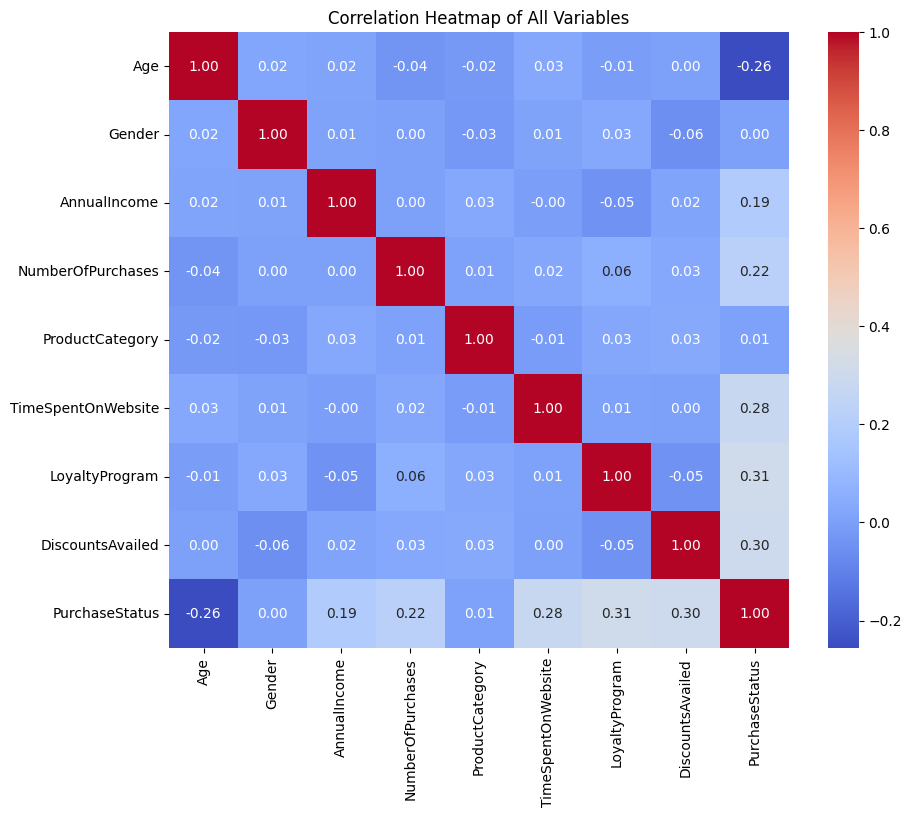

In [ ]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of All Variables')
plt.show()

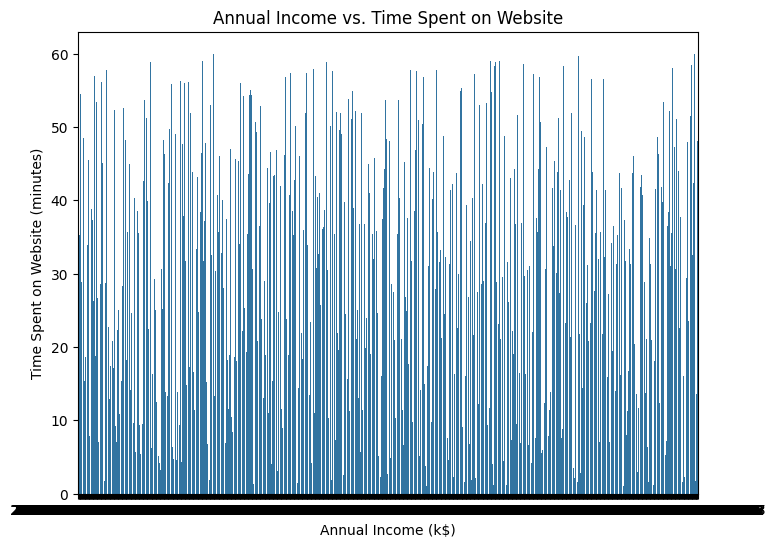

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AnnualIncome', y='TimeSpentOnWebsite')
plt.title('Annual Income vs. Time Spent on Website')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Time Spent on Website (minutes)')
plt.show()

Before creating the bar plot, we need to create bins, or groups, for the annual income. This allows us to compare the average time spent on the website across different income ranges.

C:\Users\Adam\AppData\Local\Temp\ipykernel_7416\3426801038.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_time_by_income = df.groupby('IncomeGroup')['TimeSpentOnWebsite'].mean().reset_index()


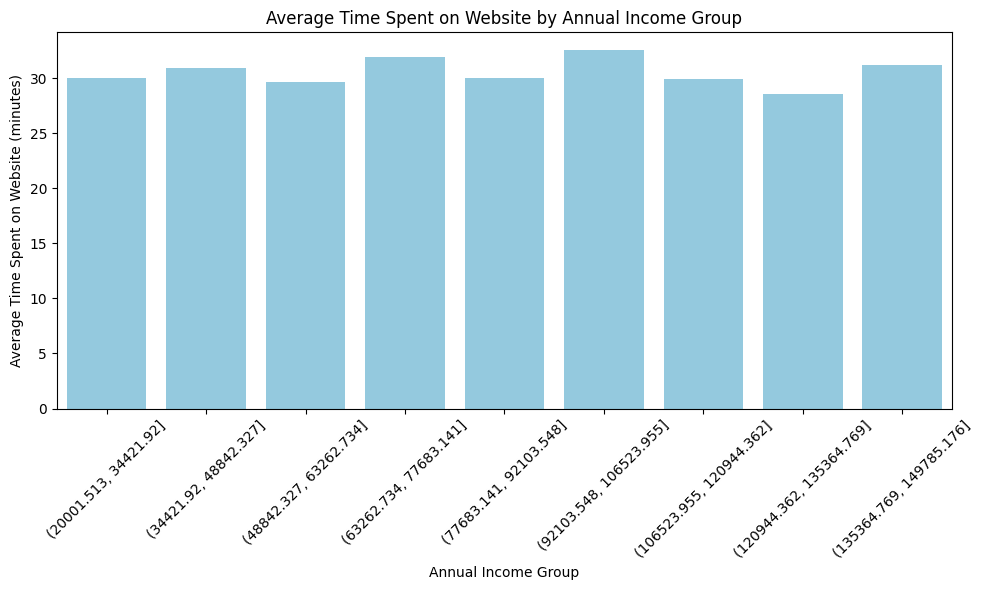

In [ ]:
#create the bins
income_bins = np.linspace(df['AnnualIncome'].min(), df['AnnualIncome'].max(), 10)
df['IncomeGroup'] = pd.cut(df['AnnualIncome'], bins=income_bins)

#mean time for each group
mean_time_by_income = df.groupby('IncomeGroup')['TimeSpentOnWebsite'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_time_by_income, x='IncomeGroup', y='TimeSpentOnWebsite', color='skyblue')
plt.xticks(rotation=45)
plt.title('Average Time Spent on Website by Annual Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Average Time Spent on Website (minutes)')
plt.tight_layout()
plt.show()

Based on the analysis above, there does not seem to be a significant correlation between annual income and the time spent on the website. The correlation coefficient is close to zero, and the bar plot shows no clear trend across income groups (which was expected).

Now, let's visualize the relationship between the age of users and the number of purchases using a bar plot. We'll group users by age and calculate the average number of purchases for each age group.

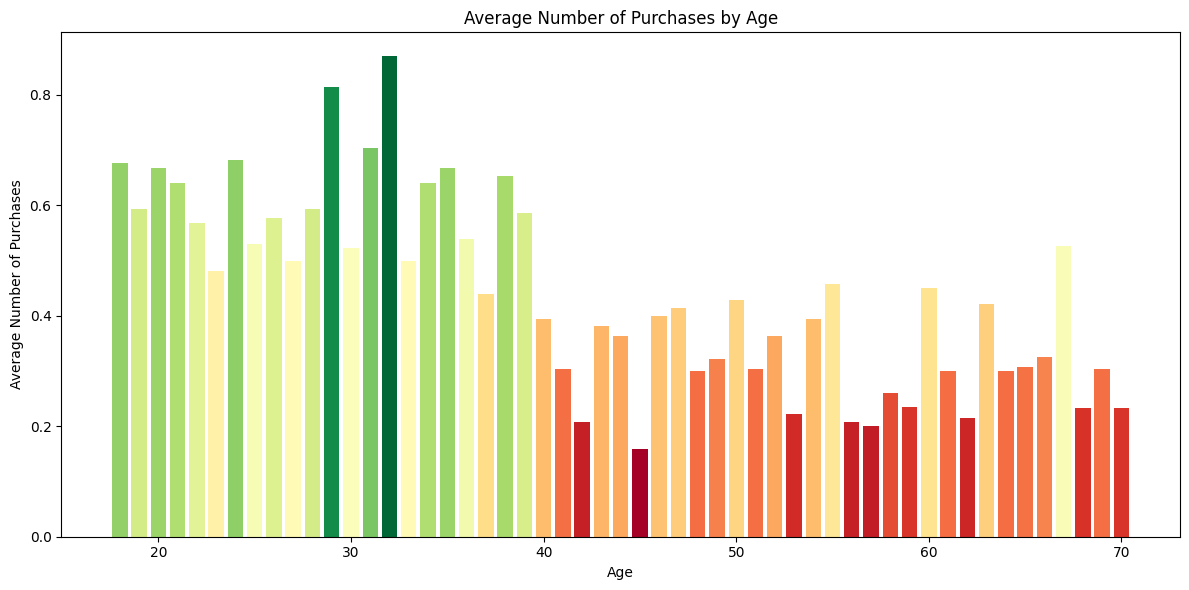

In [ ]:
mean_purchases_by_age = df.groupby('Age')['PurchaseStatus'].mean().reset_index()

#Normalize the values
norm = plt.Normalize(mean_purchases_by_age['PurchaseStatus'].min(), mean_purchases_by_age['PurchaseStatus'].max())
colors = plt.cm.RdYlGn(norm(mean_purchases_by_age['PurchaseStatus']))

plt.figure(figsize=(12, 6))
bar = plt.bar(mean_purchases_by_age['Age'], mean_purchases_by_age['PurchaseStatus'], color=colors)
plt.title('Average Number of Purchases by Age')
plt.xlabel('Age')
plt.ylabel('Average Number of Purchases')
plt.tight_layout()
plt.show()

As shown above, most customers are under the age of 40. The company could consider focusing even more on this younger customer base, or alternatively, increase marketing efforts to better engage the older segment.